In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn import model_selection, preprocessing, metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [79]:
data = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/cleaned_project_list.csv')

In [80]:
data = data.drop(columns='Unnamed: 0')
data = data.drop(columns='Comment Length')

In [81]:
data = data.drop(columns='Merge Frequency')

In [84]:
data['Project Status'].replace(2,0,inplace=True)

In [100]:
pd.set_option('display.max_rows', None)
data['Project Status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

# Exploratory data analysis

In [86]:
data.shape

(123, 14)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Full Name      123 non-null    object
 1   Project Status         123 non-null    int64 
 2   Project Startdate      123 non-null    object
 3   Project Enddate        123 non-null    object
 4   PR Number              123 non-null    int64 
 5   Merged PR Number       123 non-null    int64 
 6   First PR Created Time  123 non-null    object
 7   Issue Comment Number   123 non-null    int64 
 8   Review Comment Number  123 non-null    int64 
 9   Commits number         123 non-null    int64 
 10  Stars                  123 non-null    int64 
 11  Forks                  123 non-null    int64 
 12  size                   123 non-null    int64 
 13  contributor            123 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 13.6+ KB


In [88]:
data.describe()

,Project Status,PR Number,Merged PR Number,Issue Comment Number,Review Comment Number,Commits number,Stars,Forks,size,contributor
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000
mean,0.796748,2162.536585,1151.609756,6778.479675,6814.902439,5294.739837,3323.650407,1351.910569,1.136638e+05,110.861789
std,0.404064,4290.860843,2111.854541,11510.233210,15660.452921,6924.735213,7290.734072,3277.568499,1.682541e+05,118.705264
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.320000e+02,3.000000
25%,1.000000,67.500000,20.000000,120.500000,60.500000,986.000000,95.500000,65.000000,1.362200e+04,22.000000
50%,1.000000,502.000000,192.000000,940.000000,832.000000,2674.000000,552.000000,214.000000,3.745600e+04,53.000000
75%,1.000000,2385.000000,1357.500000,7905.000000,5616.500000,6842.500000,2158.000000,913.000000,1.748695e+05,173.000000
max,1.000000,34300.000000,10700.000000,40000.000000,103228.000000,34628.000000,40000.000000,24263.000000,1.326009e+06,440.000000


We see that there are no missing values or significant outliers in any column.

In [89]:
data.head()

,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Issue Comment Number,Review Comment Number,Commits number,Stars,Forks,size,contributor
0,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,40000,41972,14056,23673,9559,137059,416
1,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,8527,2851,24588,1561,1340,365411,129
2,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,1772,3561,6122,347,180,14807,41
3,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,12980,8235,2578,7372,1340,24303,236
4,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,6,3,8582,213,115,181003,53


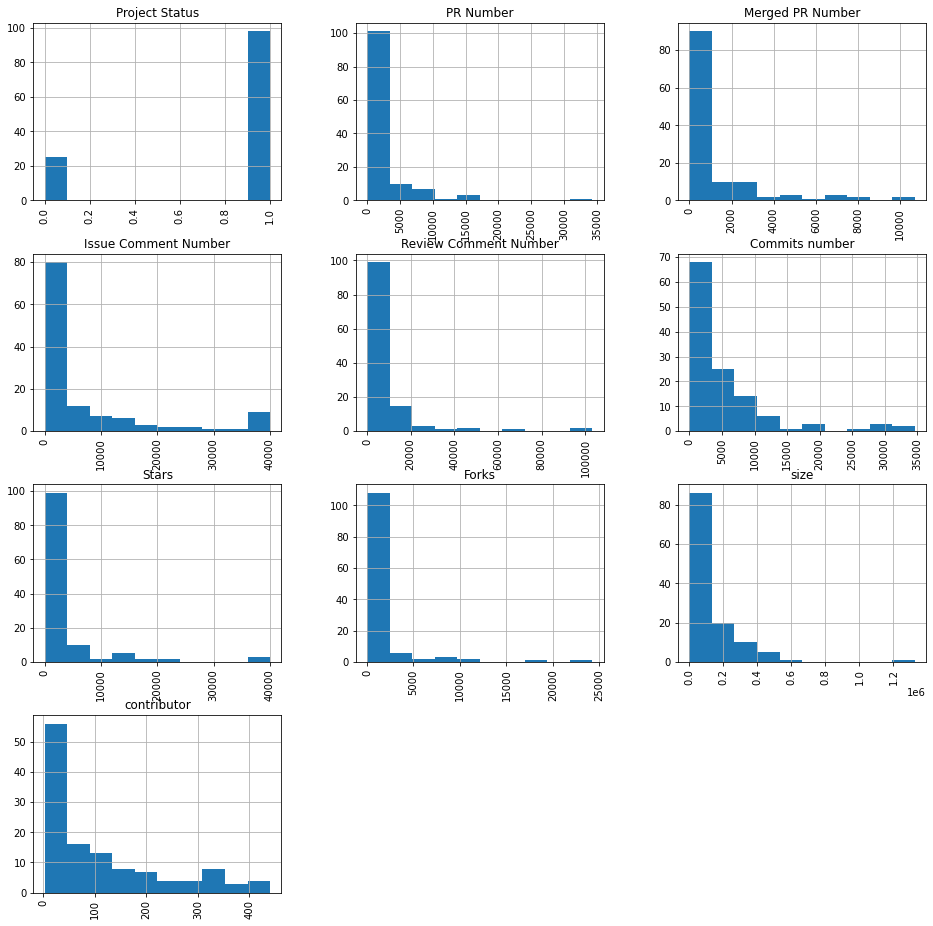

In [90]:
data.hist(figsize=(16,16),xrot = 90)
plt.show()

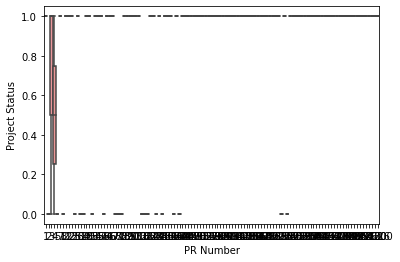

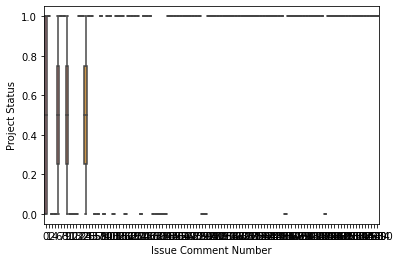

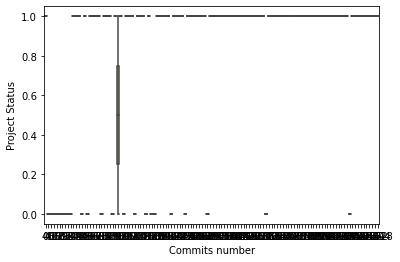

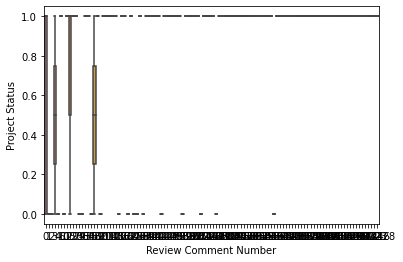

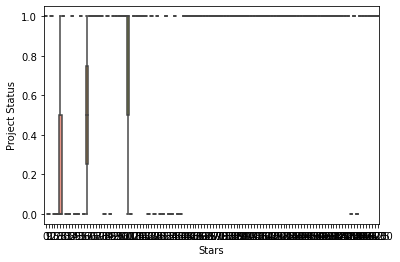

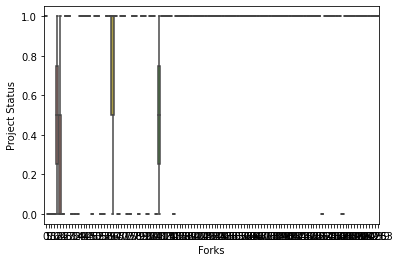

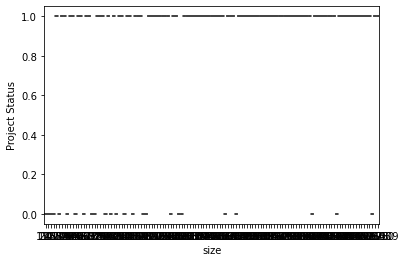

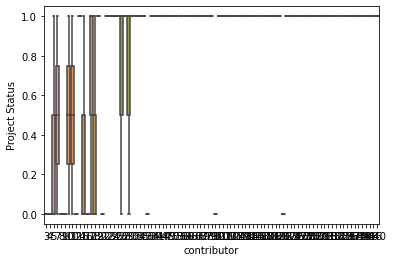

In [91]:
num_cols = ['PR Number',data['Issue Comment Number'],data['Commits number'],data['Review Comment Number'],data['Stars'],data['Forks'],data['size'],'contributor']

for col in num_cols:
    sns.boxplot(y = data['Project Status'].astype('category'), x=col, data=data)
    plt.show()

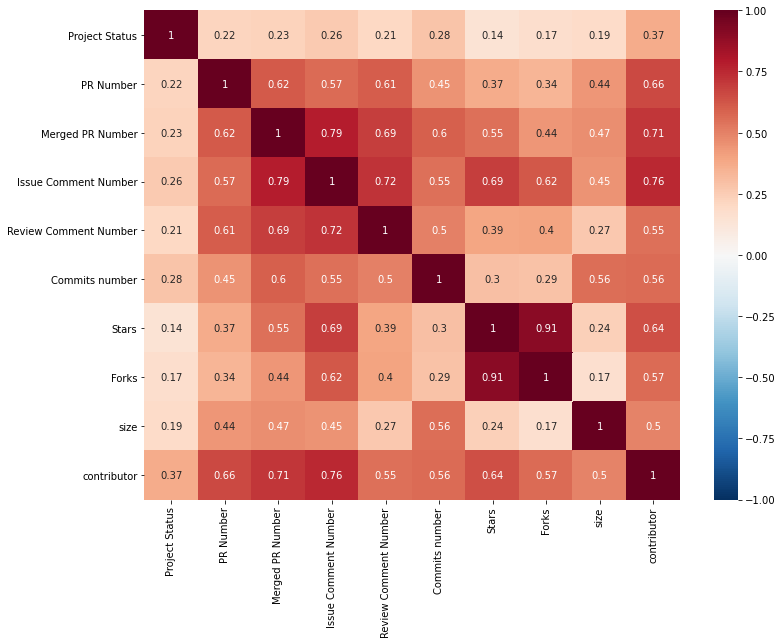

In [92]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [93]:
from sklearn import tree
y = data['Project Status']
X = data.iloc[:,4:]

In [94]:
X = X.drop(columns='First PR Created Time')

In [101]:
X = X.to_numpy(dtype=int, copy=True)

In [102]:
y = y.to_numpy(dtype=int, copy=True)

# logistic regression

In [103]:
import statsmodels.api as sm

In [104]:
model = sm.Logit(y, X)

In [105]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.286706
         Iterations 11


In [106]:
result.params

array([ 2.34549044e-04, -1.87333546e-03, -7.65941447e-05,  5.50234590e-04,
        1.42525802e-04, -1.03553036e-03,  4.31727981e-03, -2.11474740e-06,
        3.23701021e-02])

In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.4321
Time:                        22:17:53   Log-Likelihood:                -35.265
converged:                       True   LL-Null:                       -62.100
Covariance Type:            nonrobust   LLR p-value:                 7.999e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.002      0.096      0.923      -0.005       0.005
x2            -0.0019      0.003     -0.687      0.492      -0.007       0.003
x3         -7.659e-05      0.000     -0.183      0.855      -0.001       0.001
x4             0.0006      0.001      0.913      0.361      -0.001       0.002
x5             0.0001      0.000      0.601      0.548      -0.000       0.001
x6            -0.0010      0.001     -1.973      0.049      -0.002   -6.66e-06
x7             0.0043      0.003      1.306      0.192      -0.002       0.011
x8         -2.115e-06    3.2e-06     -0.660      0.509   -8.39e-06    4.16e-06
x9             0.0324      0.024      1.355      0.176      -0.014       0.079
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# todo：


    decision tree

[Text(131.52857142857144, 203.85, 'X[8] <= 21.5\ngini = 0.324\nsamples = 123\nvalue = [25, 98]'),
 Text(47.82857142857143, 176.67000000000002, 'X[4] <= 255.0\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(23.914285714285715, 149.49, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(71.74285714285715, 149.49, 'X[6] <= 62.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(47.82857142857143, 122.31, 'X[4] <= 726.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(23.914285714285715, 95.13, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(71.74285714285715, 95.13, 'X[4] <= 1136.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(47.82857142857143, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(95.65714285714286, 67.94999999999999, 'X[5] <= 55.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(71.74285714285715, 40.77000000000001, 'X[0] <= 55.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(47.82857142857143, 13.590000000000003, 'gini = 0.

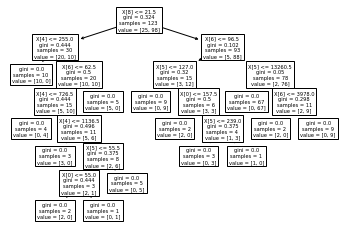

In [109]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)